# Location-based analysis of the crimes in Los-Angeles
### (Note): Calling for google-maps API, so have your own API under api_keys.py

In [2]:
%matplotlib notebook

# Dependencies
import pandas as pd
import gmaps
import numpy as np

from matplotlib import pyplot as plt

from api_keys import g_key

In [3]:
# Read data
all_crime_data_df = pd.read_csv("../data/crime/2012_2016_CrimeRate.csv")
all_crime_data_df

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,Latitude,Longitude
0,6/29/2014,141611067,7/12/2014,1,16,Foothill,1684,121,"RAPE, FORCIBLE",IC,Invest Cont,34.2103,-118.3954
1,3/13/2014,141315628,7/31/2014,1,13,Newton,1321,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,34.0320,-118.2667
2,5/15/2014,141918556,9/8/2014,1,19,Mission,1967,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",IC,Invest Cont,34.2330,-118.4386
3,12/31/2012,121228703,12/31/2012,1,12,77th Street,1249,510,VEHICLE - STOLEN,IC,Invest Cont,33.9823,-118.2841
4,1/11/2013,130204589,12/31/2012,1,2,Rampart,204,740,VANDALISM,AO,Adult Other,34.0787,-118.2844
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881509,4/3/2016,161708321,4/2/2016,2359,17,Devonshire,1747,330,BURGLARY FROM VEHICLE,IC,Invest Cont,34.2648,-118.5001
881510,9/27/2016,162017370,9/26/2016,2359,20,Olympic,2027,740,VANDALISM,AA,Adult Arrest,34.0654,-118.2992
881511,1/10/2016,161504459,1/9/2016,2359,15,N Hollywood,1596,330,BURGLARY FROM VEHICLE,IC,Invest Cont,34.1385,-118.368
881512,7/1/2016,162112552,6/30/2016,2359,21,Topanga,2139,310,BURGLARY,IC,Invest Cont,34.2010,-118.5623


In [4]:
# Add Datetime column for occurence and reported
all_crime_data_df["DATE.OCC.datetime"] = pd.to_datetime(all_crime_data_df["DATE.OCC"])
all_crime_data_df["Date.Rptd.datetime"] = pd.to_datetime(all_crime_data_df["Date.Rptd"])

# Add occurence and reported year/month and day separetely
all_crime_data_df["DATE.OCC.year"] = all_crime_data_df.apply(lambda row: row["DATE.OCC.datetime"].year, axis=1)
all_crime_data_df["Date.Rptd.year"] = all_crime_data_df.apply(lambda row: row["Date.Rptd.datetime"].year, axis=1)

all_crime_data_df["DATE.OCC.month"] = all_crime_data_df.apply(lambda row: row["DATE.OCC.datetime"].month, axis=1)
all_crime_data_df["Date.Rptd.month"] = all_crime_data_df.apply(lambda row: row["Date.Rptd.datetime"].month, axis=1)

all_crime_data_df["DATE.OCC.day"] = all_crime_data_df.apply(lambda row: row["DATE.OCC.datetime"].day, axis=1)
all_crime_data_df["Date.Rptd.day"] = all_crime_data_df.apply(lambda row: row["Date.Rptd.datetime"].day, axis=1)

# Collect the values that are reported.year > occurence.year
# all_crime_data_df["Late.By.Year"] = all_crime_data_df.apply(lambda row: row["Date.Rptd.datetime"].year > row["DATE.OCC.datetime"].year, axis=1)


In [5]:
late_by_year_count = (all_crime_data_df["Date.Rptd.year"] > all_crime_data_df["DATE.OCC.year"]).sum()
unique_rptd_years = all_crime_data_df["Date.Rptd.year"].unique()
unique_occ_years = all_crime_data_df["DATE.OCC.year"].unique()

print(unique_rptd_years)
print(unique_occ_years)

[2014 2012 2013 2015 2016]
[2014 2012 2013 2015 2016]


In [6]:
(all_crime_data_df["Date.Rptd.datetime"] - all_crime_data_df["DATE.OCC.datetime"])

0         -13 days
1        -140 days
2        -116 days
3           0 days
4          11 days
            ...   
881509      1 days
881510      1 days
881511      1 days
881512      1 days
881513      8 days
Length: 881514, dtype: timedelta64[ns]

In [9]:
all_crime_data_df["Late.By.Year"] = all_crime_data_df["Date.Rptd.year"] > all_crime_data_df["DATE.OCC.year"]
all_crime_data_df["Late.By.Datetime"] = all_crime_data_df["Date.Rptd.datetime"] - all_crime_data_df["DATE.OCC.datetime"]

In [10]:
# Count late_by_year for each year
late_by_year_per_year = np.zeros_like(unique_occ_years)
for yix in range(len(unique_occ_years)):
    year = unique_occ_years[yix]
    mask_for_year = all_crime_data_df["DATE.OCC.year"] == year
    late_by_year_per_year[yix] = all_crime_data_df[mask_for_year]["Late.By.Year"].sum()
    

In [ ]:
late_by_year_per_year

In [11]:
all_crime_data_df["Late.By.Year"].sum()/len(all_crime_data_df)
unique_years = all_crime_data_df["Date.Rptd.datetime"].apply(lambda row: row.year).unique()

In [12]:
late_by_year_count = np.zeros_like(unique_years, dtype=np.int)
for yix in range(len(unique_years)):
    year = unique_years[yix]
    print(f"At year = {year}")
    late_by_year_count[yix] = all_crime_data_df.apply(lambda row: row["DATE.OCC.datetime"].year == year, axis=1).sum()

At year = 2014
At year = 2012
At year = 2013
At year = 2015
At year = 2016


In [ ]:
late_by_year_count

## Location-based analysis

In [14]:
# Crime description per location
unique_area_names = all_crime_data_df["AREA.NAME"].unique()
unique_years = all_crime_data_df["DATE.OCC.year"].unique()
unique_months = all_crime_data_df["DATE.OCC.month"].unique()

In [15]:
area_year_counts = np.zeros((len(unique_area_names), len(unique_years)))
for yix in range(len(unique_years)):
    year = unique_years[yix]
    print(f"Year = {year}")
    for arix in range(len(unique_area_names)):
        area = unique_area_names[arix]
        area_year_counts[arix, yix] = np.bitwise_and(all_crime_data_df["AREA.NAME"] == area, 
                                                 all_crime_data_df["DATE.OCC.year"] == year).sum()
        
area_months_counts = np.zeros((len(unique_area_names), len(unique_months)))
for mix in range(len(unique_months)):
    month = unique_months[mix]
    print(f"Month = {month}")
    for arix in range(len(unique_area_names)):
        area = unique_area_names[arix]
        area_months_counts[arix, mix] = np.bitwise_and(all_crime_data_df["AREA.NAME"] == area, 
                                                 all_crime_data_df["DATE.OCC.month"] == month).sum()




Year = 2014
Year = 2012
Year = 2013
Year = 2015
Year = 2016
Month = 7
Month = 9
Month = 12
Month = 11
Month = 10
Month = 8
Month = 6
Month = 5
Month = 4
Month = 3
Month = 2
Month = 1


<IPython.core.display.Javascript object>


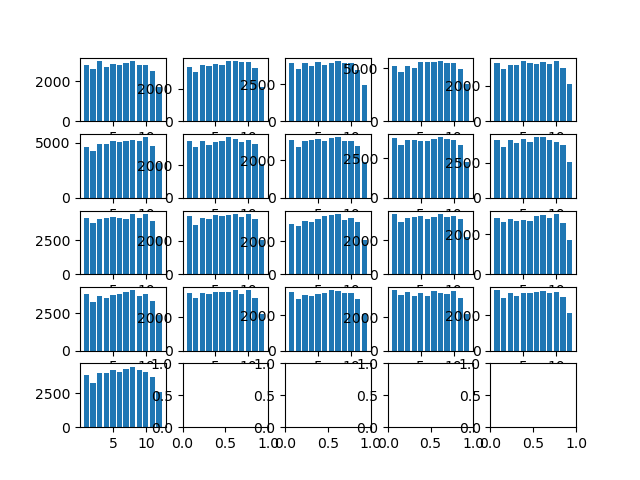

In [16]:
fig, axes2d = plt.subplots(5,5)
axes = axes2d.flatten()

for arix in range(len(unique_area_names)):
    axes[arix].bar(unique_months, area_months_counts[arix, :])
    

<IPython.core.display.Javascript object>


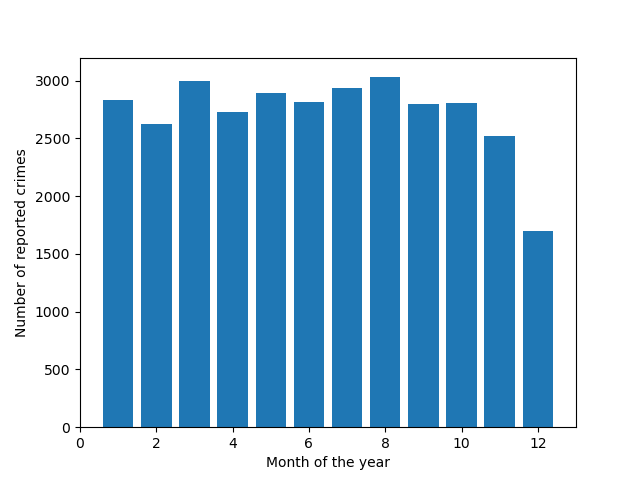

Text(0, 0.5, 'Number of reported crimes')

In [17]:
fig, ax = plt.subplots(1,1)
ax.bar(unique_months, area_months_counts[0,:])
ax.set_xlim(0,13)
ax.set_ylim(0,3200)
ax.set_xlabel("Month of the year")
ax.set_ylabel("Number of reported crimes")

<IPython.core.display.Javascript object>


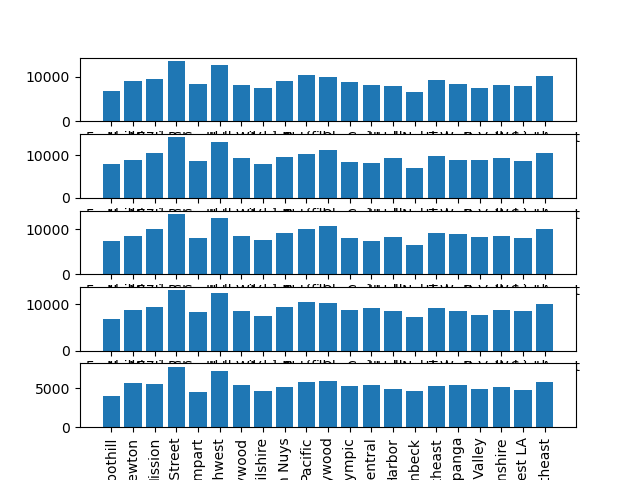

<ipython-input-18-20477b60ce7c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes[-1].set_xticklabels(unique_area_names, rotation=90)


In [18]:
fig, axes = plt.subplots(len(unique_years), 1)
for yix in range(len(unique_years)):
    year = unique_years[yix]
    axes[yix].bar(unique_area_names, area_year_counts[:,yix])
    
_ = axes[-1].set_xticklabels(unique_area_names, rotation=90)

In [ ]:
fig, ax = plt.subplots(1,1)
all_crime_data_df.groupby("DATE.OCC.day").count()["Date.Rptd"].plot(kind="bar", ax=ax)

In [ ]:
# Configure gmaps
gmaps.configure(api_key=g_key)

In [ ]:
all_crime_data_df.groupby("CrmCd.Desc").count()

In [ ]:
# Get unique area names
unique_area_names = crime_data_df["AREA.NAME"].unique()

# Get unique crime description
unique_crime_desc = crime_data_df["CrmCd.Desc"].unique()

In [ ]:
# Collect by Area Code
area_names_group = crime_data_df.groupby("AREA.NAME")
area_location_group = crime_data_df.groupby("AREA.NAME")

# Total number of crimes in each area
counts_per_area = area_names_group["AREA"].count()
locations_per_area = area_names_group["Latitude"]

counts_per_area.plot(kind="bar")

In [ ]:
# Get area info

a = np.zeros((len(unique_area_codes),4))
split_by_area = []
for arix in range(len(unique_area_codes)):
    split_by_area.append(crime_data_df[crime_data_df["AREA"] == unique_area_codes[arix]])
    a[arix,:] = split_by_area[arix]["CrmCd.Desc"].value_counts(normalize=True)
    
split_by_area[0]["CrmCd.Desc"].value_counts(normalize=True)

crime_area_types = crime_data_df.groupby(["CrmCd.Desc","AREA.NAME"])["Status"].count().unstack("AREA.NAME")
# crime_area_types.plot(kind="bar")
crime_area_types

In [ ]:
fig,axes = plt.subplots(4,1)
for ix in range(4):
    axes[ix].bar(unique_area_names, a[:,ix])
    axes[ix].set_xticklabels(unique_area_names, rotation=90)
    axes[ix].set_title(unique_area_names[ix])

In [ ]:
m = gmaps.Map()
# Clear nan Lat and Long
# all_crime_data_df.dropna(0, inplace=True)
m.add_layer(gmaps.heatmap_layer(locations=all_crime_data_df[["Latitude","Longitude"]], max_intensity=20))
m